In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
df = pd.read_json( "/content/Amazon_reviews.json" , lines=True)
print(df.head())


       reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  
0                                 Looks Good      1400630400  05 21, 2014  
1                      Really great product.      1389657600  01 14, 2014  
2                         

In [9]:
df.dropna(subset=['reviewText'], inplace=True)
df['reviewTime'] = pd.to_datetime(df['unixReviewTime'], unit='s')


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [13]:
df['cleaned_review'] = df['reviewText'].apply(clean_text)

In [12]:
#df
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<ipython-input-14-454a5c709949>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


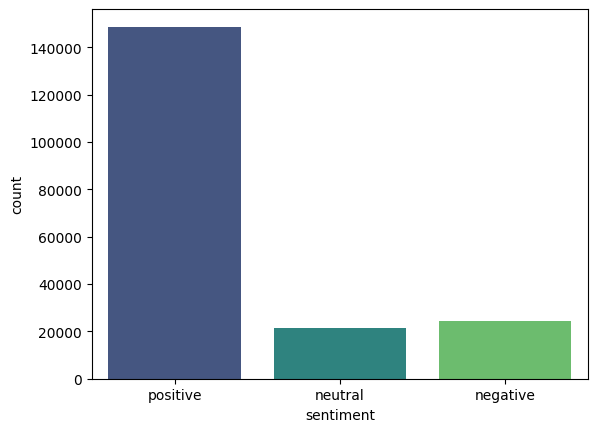

In [14]:
sentiment_mapping = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}
df['sentiment'] = df['overall'].map(sentiment_mapping)
sns.countplot(x=df['sentiment'], palette='viridis')
plt.show()

In [15]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7907837893437565
              precision    recall  f1-score   support

    negative       0.85      0.21      0.34      4890
     neutral       0.62      0.00      0.01      4209
    positive       0.79      1.00      0.88     29789

    accuracy                           0.79     38888
   macro avg       0.75      0.40      0.41     38888
weighted avg       0.78      0.79      0.72     38888

